In [3]:
import numpy as np
import pandas as pd


In [4]:
data=pd.read_csv('spam.csv')

In [5]:
data.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2109,ham,Lara said she can loan me &lt;#&gt; .,NaN,NaN,NaN
3304,ham,Ee msg na poortiyagi odalebeku: Hanumanji 7 na...,NaN,NaN,NaN
5397,ham,That's necessarily respectful,NaN,NaN,NaN
4559,ham,I'm awake oh. What's up.,NaN,NaN,NaN
3747,ham,"A bit of Ur smile is my hppnss, a drop of Ur t...",NaN,NaN,NaN


In [6]:
data.shape

(5572, 5)

# 1. DATA CLEANING......

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
#drop last 3 cols
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
data.sample(5)

,v1,v2
2750,ham,Ok but tell me half an hr b4 u come i need 2 p...
1027,ham,Are you not around or just still asleep? :V
817,ham,Also are you bringing galileo or dobby
2440,ham,"Great. I'm in church now, will holla when i ge..."
631,ham,Thank u!


In [10]:
# Renaming the column
data.rename(columns={'v1':'target','v2':'text'},inplace=True)
data.sample(5)

,target,text
482,ham,Watching tv lor...
2084,ham,How are you. Wish you a great semester
5309,ham,"Jolly good! By the way, will give u tickets f..."
350,ham,"Nah can't help you there, I've never had an ip..."
391,ham,Hey so this sat are we going for the intro pil...


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['target']=encoder.fit_transform(data['target'])

In [12]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# missing value
data.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
# check for duplicate values
data.duplicated().sum()

403

In [15]:
# remove duplicate
data=data.drop_duplicates(keep='first')
data.duplicated().sum()

0

In [16]:
data.shape

(5169, 2)

In [17]:
data['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

# exploratory data analysis..

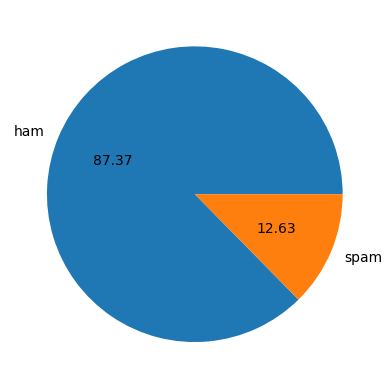

In [18]:



import matplotlib.pyplot as plt
plt.pie(data['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [19]:
import nltk

In [20]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11002]
[nltk_data]     getaddrinfo failed>


False

In [21]:
# text counts in numeric characters
data['num_character']=data['text'].apply(len)

In [22]:
data.head()

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
# number of words break
data['text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [24]:
#number of words counts
data['num_wordCounts']=data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:
data.head()

,target,text,num_character,num_wordCounts
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
#number of sentences basis break and count
data['num_sentences']=data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [27]:
data.head()

,target,text,num_character,num_wordCounts,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
data[['num_character','num_wordCounts','num_sentences']].describe()

,num_character,num_wordCounts,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
#ham messages analysis..
data[data['target']==0][['num_character','num_wordCounts','num_sentences']].describe()

,num_character,num_wordCounts,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
#  with spam messages analysis...
data[data['target']==1][['num_character','num_wordCounts','num_sentences']].describe()

,num_character,num_wordCounts,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [31]:
#histogram plot spam and ham
import seaborn as sns

<Axes: xlabel='num_character', ylabel='Count'>

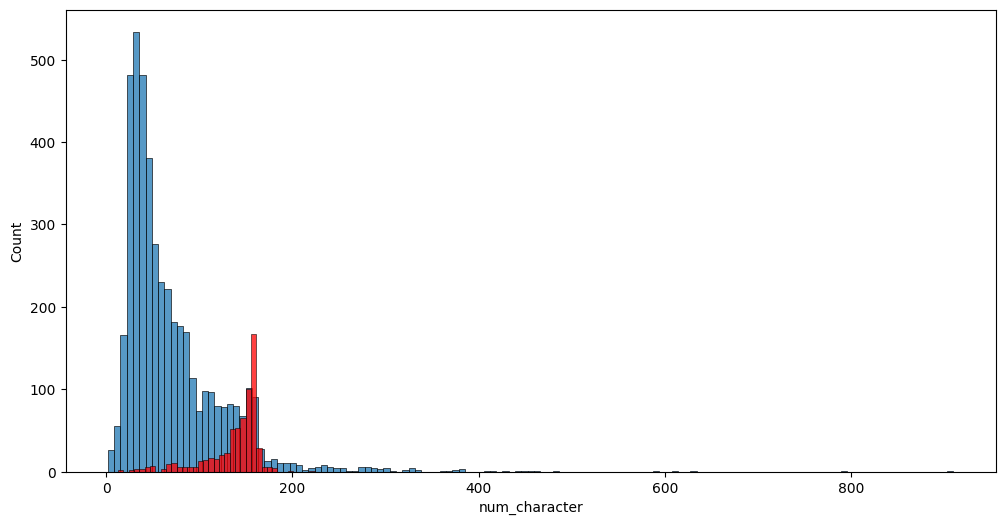

In [32]:
# number of characters in ham messages histogram plot
plt.figure(figsize=(12,6))
sns.histplot(data[data['target']==0]['num_character'])
sns.histplot(data[data['target']==1]['num_character'],color='red')

<Axes: xlabel='num_wordCounts', ylabel='Count'>

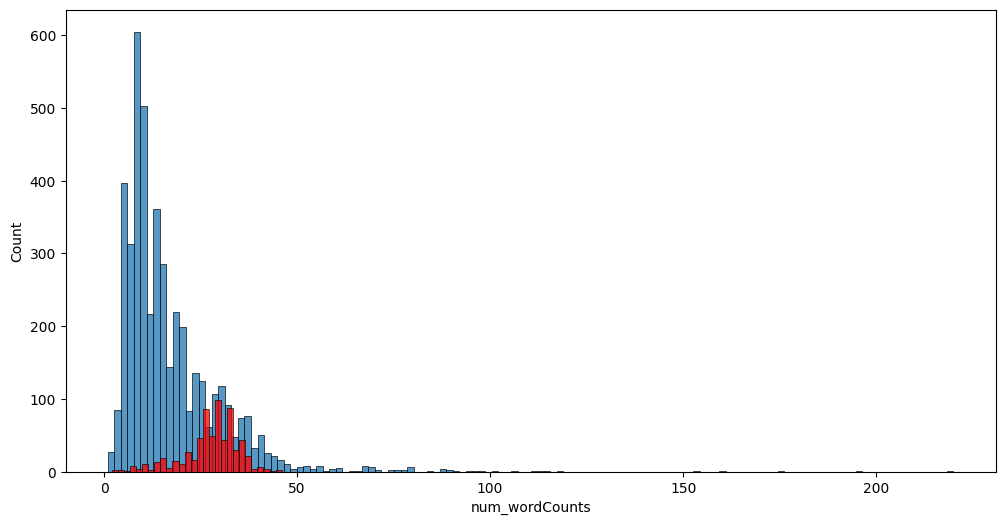

In [33]:
#number of words histogram plot
plt.figure(figsize=(12,6))
sns.histplot(data[data['target']==0]['num_wordCounts'])
sns.histplot(data[data['target']==1]['num_wordCounts'],color='red')

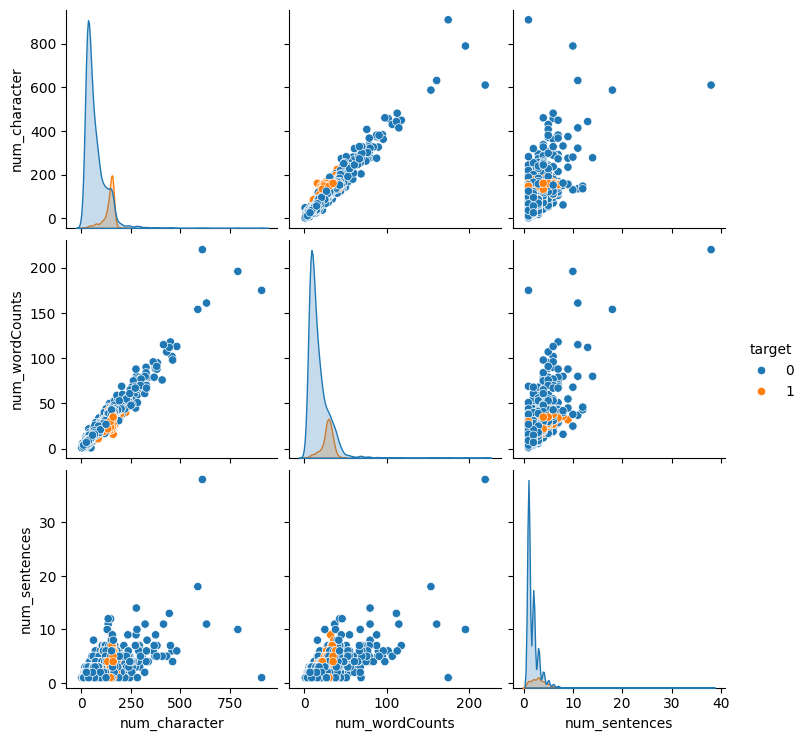

In [34]:
# check correlation char,word,sentences
sns.pairplot(data,hue='target')

In [35]:
data.sample(10)

,target,text,num_character,num_wordCounts,num_sentences
4300,0,Are there TA jobs available? Let me know pleas...,82,17,2
4710,0,Huh so slow i tot u reach long ago liao... U 2...,77,21,1
5419,0,I'm at bruce &amp; fowler now but I'm in my mo...,82,26,1
4299,0,Erm... Woodland avenue somewhere. Do you get t...,104,21,2
2834,0,"Ya they are well and fine., BBD(pooja) full pi...",131,31,1
908,0,WHITE FUDGE OREOS ARE IN STORES,31,6,1
2958,0,Buzzzz! *grins* Did I buzz your ass? Buzz your...,147,37,7
4401,0,Good FRIENDS CaRE for each Other.. CLoSE Frien...,138,26,2
4950,0,hi baby im sat on the bloody bus at the mo and...,136,32,2
460,0,Where did u go? My phone is gonna die you have...,62,17,2


In [36]:
# data.drop(columns=['text'],axis=1,inplace=True
a=data.pop('text')
print(a)


0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object


In [37]:
data.head()

,target,num_character,num_wordCounts,num_sentences
0,0,111,24,2
1,0,29,8,2
2,1,155,37,2
3,0,49,13,1
4,0,61,15,1


In [38]:
data.corr()


,target,num_character,num_wordCounts,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_character,0.384717,1.000000,0.965760,0.624139
num_wordCounts,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

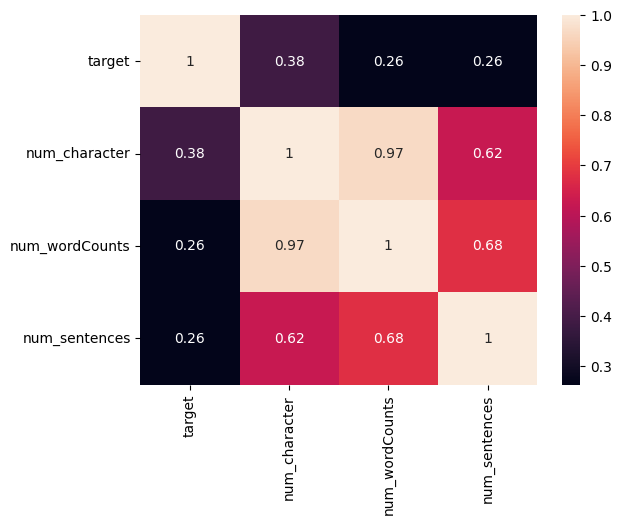

In [39]:
sns.heatmap(data.corr(),annot=True)

In [40]:

data = data.join(a)


In [41]:
data.head()

,target,num_character,num_wordCounts,num_sentences,text
0,0,111,24,2,"Go until jurong point, crazy.. Available only ..."
1,0,29,8,2,Ok lar... Joking wif u oni...
2,1,155,37,2,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,49,13,1,U dun say so early hor... U c already then say...
4,0,61,15,1,"Nah I don't think he goes to usf, he lives aro..."


In [42]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11002]
[nltk_data]     getaddrinfo failed>


False

In [43]:
from nltk.corpus import stopwords

import string


from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()


In [44]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():#removing special character
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))# root form of meaning ex:- (dancing ,danc) and loving, love 
        
    return " ".join(y)

In [45]:

transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."
)

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [46]:
data['text'][10]


"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [47]:
data['transformed_text']=data['text'].apply(transform_text)
data.head()

,target,num_character,num_wordCounts,num_sentences,text,transformed_text
0,0,111,24,2,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,29,8,2,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,155,37,2,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,49,13,1,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,61,15,1,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [48]:
pip install wordcloud



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [49]:
# word cloud :-imported words will see zoom formed
from wordcloud import WordCloud
wc=WordCloud(width=600,height=600,min_font_size=10, background_color='white')

In [50]:
spam_wc= wc.generate(data[data['target']==1]['transformed_text'].str.cat(sep=" "))

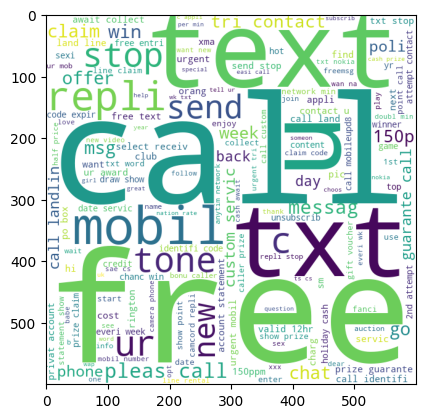

In [51]:
plt.imshow(spam_wc)

spam word detect

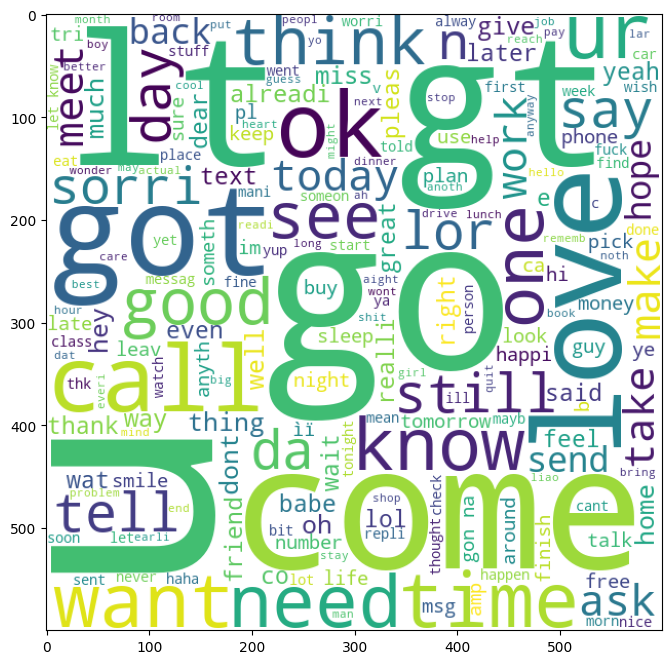

In [52]:
ham_wc= wc.generate(data[data['target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(16,8))
plt.imshow(ham_wc)

In [53]:
# spam messages words of count and store the list form
spam_corpus=[]
for msg in data[data['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [54]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [55]:
len(spam_corpus)

9939

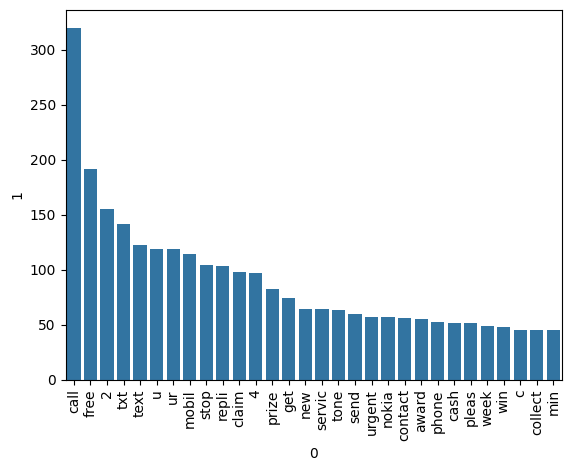

In [56]:
#most common word in use spam 30 word repeated
import seaborn as sns
from collections import Counter

sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [57]:
# ham messages words of count and store the list form
ham_corpus=[]
for msg in data[data['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [58]:
ham_corpus

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatåõ',
 'wa

In [59]:
len(ham_corpus)

35404

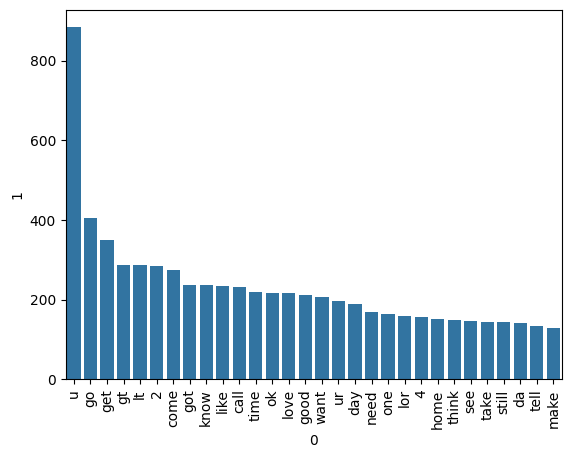

In [60]:
#most common word in use ham 30 word repeated
import seaborn as sns
from collections import Counter

sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

4. Module Building

In [61]:
# using bag of words vectorize in numeric form
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [62]:
X=cv.fit_transform(data['transformed_text']).toarray()

In [63]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [64]:
X.shape

(5169, 6708)

In [65]:
y=data['target'].values

In [66]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [67]:
from sklearn.model_selection import train_test_split


In [68]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [69]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [70]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [71]:
# Gaussian score
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [72]:
# multinomial score
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [73]:
# Bernaulli score
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


# use Tfidf vectorize numeric form

In [74]:

from sklearn.feature_extraction.text import TfidfVectorizer
Tfidf=TfidfVectorizer(max_features=3000)

In [75]:
X=Tfidf.fit_transform(data['transformed_text']).toarray()

In [76]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [77]:
X.shape

(5169, 3000)

In [78]:
y=data['target'].values

In [79]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [82]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [83]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [95]:
# Gaussian score
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [84]:
# multinomial score
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [97]:
# Bernaulli score
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier



In [100]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)


In [101]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    
}

In [102]:
#function create a predict accuracy,precision
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [103]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [104]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9323017408123792
Precision -  0.8333333333333334
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829


C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659


In [107]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [108]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
7,BgC,0.958414,0.868217
3,DT,0.932302,0.833333


In [112]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [113]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,LR,Accuracy,0.958414
5,AdaBoost,Accuracy,0.960348
6,BgC,Accuracy,0.958414
7,DT,Accuracy,0.932302
8,KN,Precision,1.000000
9,NB,Precision,1.000000


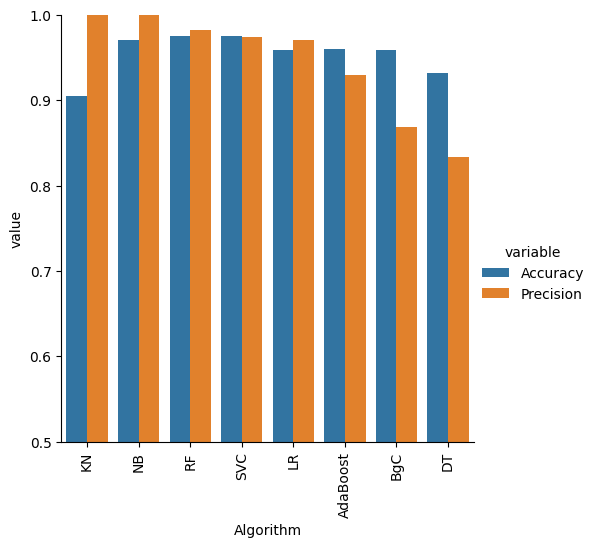

In [114]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [86]:
import pickle
pickle.dump(Tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [ ]:
#  i will go with multinomial precision score is best Tdidf--> MNB